In [1]:

import torch.nn as nn
import torch
# from img_dataset import xy_flatten
# from img_dataset import img_flatten, xy_flatten, crop_size
# from model import model
# from fourier_mlp import MLP
# import torch.optim as optim
# import numpy as np
# from fourier import GaussianFourier



# class MLP(nn.Module):
#         def __init__ (self, in_feature: int, hidden_feature: int, hidden_layers: int, out_feature: int):
#             super().__init__()

#             self.hidden_layers = hidden_layers

#             self.first_layer = nn.Sequential(
#                 nn.Linear(in_feature, hidden_feature),
#                 nn.BatchNorm1d(hidden_feature),
#                 nn.ReLU()
#             )

#             self.hidden_layer = nn.Sequential(
#                 nn.Linear(hidden_feature, hidden_feature),
#                 nn.BatchNorm1d(hidden_feature),
#                 nn.ReLU()
#             )
            
#             self.last_layer = nn.Sequential(
#                 nn.Linear(hidden_feature, out_feature),
#                 nn.Sigmoid()
#             )

#         def forward(self, x):
#             # list for hidden layer features
#             hidden_layer_features = []
            
#             # first layer
#             x = self.first_layer(x)

#             # hidden layer
#             for _ in range(self.hidden_layers):
#                 x = self.hidden_layer(x)
#             hidden_layer_features.append(x)
                
            
#             x = self.last_layer(x)

#             return x, hidden_layer_features
        



        
# import torch.nn as nn
# import torch


# class MLP(nn.Module):
#     def __init__ (self, in_feature: int, hidden_feature: int, hidden_layers: int, out_feature: int):
#         super().__init__()

#         self.hidden_layer = nn.ModuleList([])

#         # first layer
#         self.first_layer = nn.Sequential(
#             nn.Linear(in_feature, hidden_feature),
#             nn.BatchNorm1d(hidden_feature),
#             nn.ReLU()
#         )

        

#         # last layer
#         self.last_layer = nn.Sequential(
#             nn.Linear(hidden_feature, out_feature),
#             nn.Sigmoid()
#         )

#         # hidden layers
#         for _ in range(hidden_layers):
#             self.hidden_layer.extend([
#                 nn.Linear(hidden_feature, hidden_feature),
#                 nn.BatchNorm1d(hidden_feature),
#                 nn.ReLU()
#             ])
        
#         # layers.extend(hidden_layer)
#         # layers.extend(out_layer_list)

#         # self.net = torch.nn.Sequential(*layers)

#     def forward(self, x):

#         hidden_layer_features = []

#         x = self.first_layer(x)

#         for layer in self.hidden_layer:
#             x = layer(x)
#             hidden_layer_features.append(x)

#         # hidden_layer_features = torch.stack(hidden_layer_features)
            

#         x = self.last_layer(x)
        
#         return x, hidden_layer_features


# # declare network
# # net = MLP(in_feature=256, hidden_feature=32, hidden_layers=8, out_feature=3)

# net = MLP(in_feature=256, hidden_feature=128, hidden_layers=8, out_feature=3)




# # print(f'net: {net}')



# # model = net














class MLP(nn.Module):
        def __init__ (self, in_feature: int, hidden_feature: int, hidden_layers: int, out_feature: int):
            super().__init__()
            
            

            self.first_layer = nn.Sequential(
                nn.Linear(in_feature, hidden_feature),
                nn.BatchNorm1d(hidden_feature),
                nn.ReLU()
            )

            self.hidden_layer_list = nn.ModuleList([
                nn.Sequential(
                    nn.Linear(hidden_feature, hidden_feature),
                    nn.BatchNorm1d(hidden_feature),
                    nn.ReLU()
                ) for _ in range(hidden_layers)
            ])
            
            self.last_layer = nn.Sequential(
                nn.Linear(hidden_feature, out_feature),
                nn.Sigmoid()
            )

        def forward(self, x):
            # list for hidden layer features
            hidden_layer_features = []
            # hidden_layer_features = torch.tensor(hidden_layer_features)
            
            # first layer
            x = self.first_layer(x)

            # hidden layer
            for layer in self.hidden_layer_list:
                x = layer(x)
                hidden_layer_features.append(x)

            hidden_layer_features_stack = torch.stack(hidden_layer_features)
                
            
            x = self.last_layer(x)

            return x, hidden_layer_features_stack
        








heat map type: <class 'list'>


,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
1,0.398438,0.402987,0.399948,0.401876,0.399847,0.398617,0.396958,0.399603,0.402870,0.403332,...,0.402877,0.399658,0.398999,0.396406,0.394544,0.399614,0.398629,0.398760,0.394818,0.397840
2,0.396493,0.393827,0.397097,0.397361,0.398912,0.396590,0.398944,0.395586,0.399011,0.397407,...,0.395727,0.396414,0.400474,0.396338,0.397975,0.397347,0.394838,0.393173,0.396487,0.395376
3,0.395019,0.396373,0.395342,0.396098,0.395500,0.395464,0.393797,0.398798,0.395173,0.398142,...,0.396824,0.395450,0.393981,0.396503,0.396997,0.397398,0.398747,0.396852,0.396364,0.398210
4,0.392778,0.395027,0.390932,0.395746,0.394351,0.392701,0.394332,0.394412,0.394218,0.392536,...,0.395798,0.391675,0.396200,0.393471,0.395200,0.395347,0.392190,0.392628,0.394966,0.394367
5,0.394388,0.393628,0.391424,0.391606,0.395633,0.389754,0.394400,0.392334,0.390507,0.394981,...,0.392866,0.390930,0.385527,0.394842,0.393279,0.394960,0.394014,0.393592,0.395600,0.392699
6,0.386341,0.389913,0.384365,0.390216,0.391201,0.389783,0.391254,0.383816,0.389883,0.387432,...,0.387523,0.394331,0.390056,0.392765,0.389136,0.388388,0.392109,0.389854,0.386056,0.385446
7,0.385911,0.389377,0.384806,0.388345,0.386928,0.386663,0.387736,0.383538,0.390490,0.389690,...,0.385910,0.382537,0.387734,0.385463,0.388806,0.387989,0.382293,0.386162,0.386259,0.385785
8,0.387115,0.383838,0.377263,0.374244,0.387844,0.387807,0.375521,0.379899,0.389593,0.379093,...,0.388242,0.379545,0.385616,0.381038,0.383907,0.383361,0.388261,0.383682,0.388329,0.386204


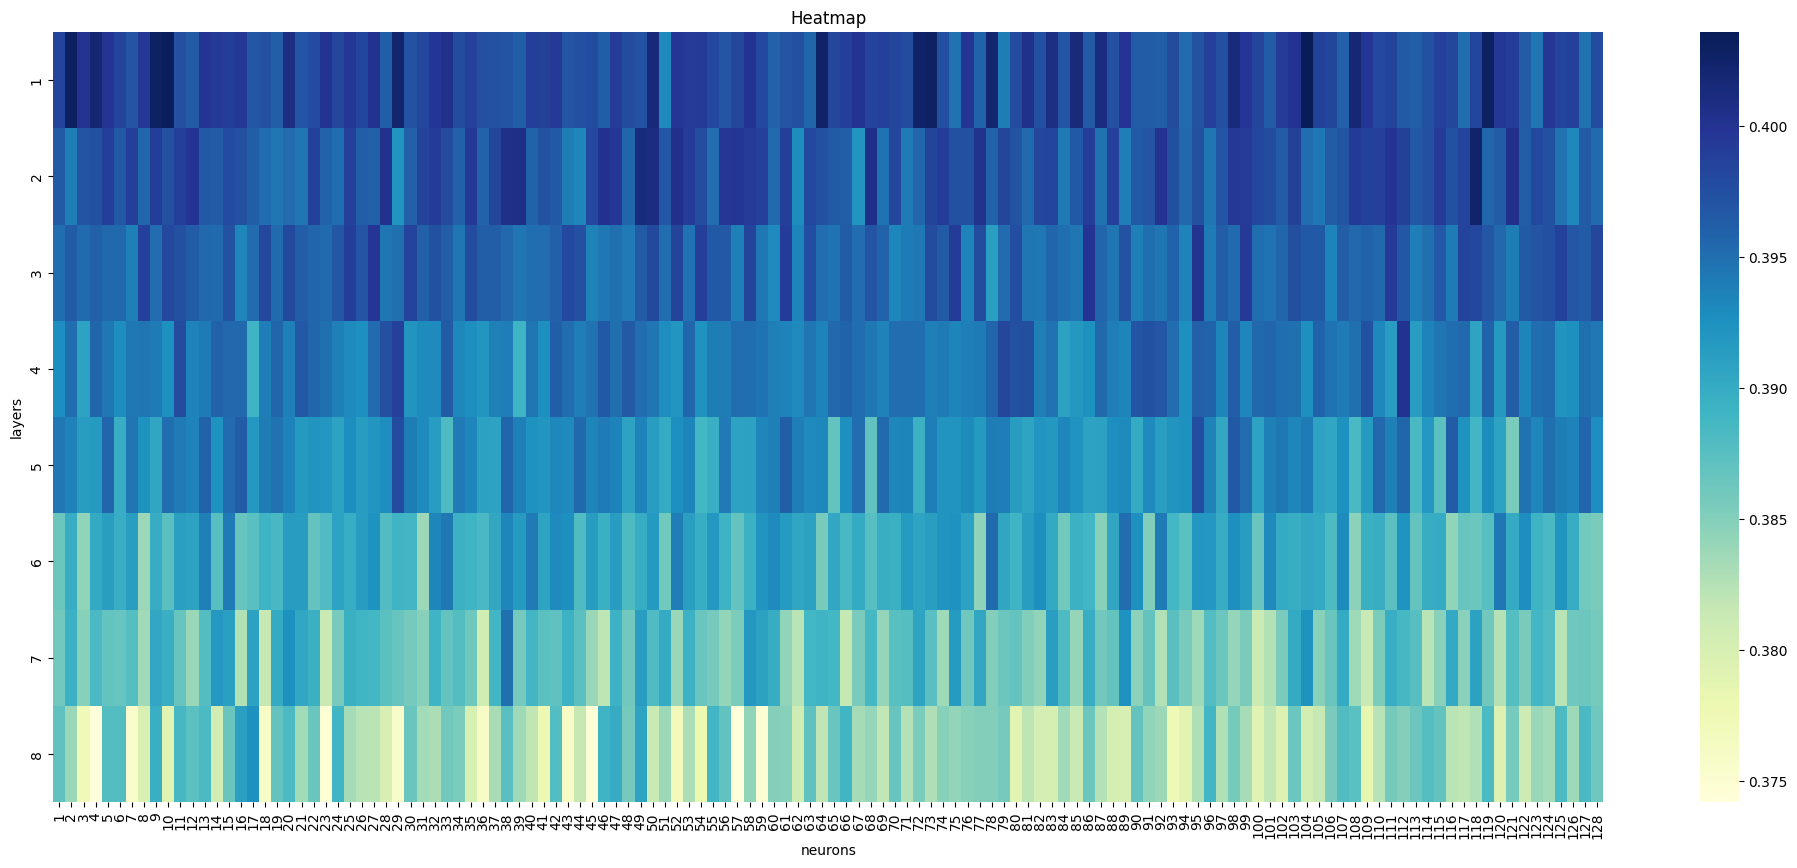

In [44]:
from img_dataset import img_flatten, xy_flatten, crop_size
# from model import model
from mlp_heatmap import MLP
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import torch
import numpy as np
from fourier import GaussianFourier
from PIL import Image
import seaborn as sns
# from train import losses_train
import pandas as pd

# params
learning_rate = 5e-3
num_epochs = 300
hidden_feature = 128
hidden_layers = 8
max_pixel = 1.0

# set the target
# target = img_flatten
target = img_flatten

# fourier (mapping size = in_feature / 2)
fourier_result = GaussianFourier(num_input_channels=2, mapping_size = 128, scale=4)(xy_flatten)
# print(f'fourier result shape: {fourier_result.shape}')

net_fourier = MLP(in_feature=256, hidden_feature=hidden_feature, hidden_layers=hidden_layers, out_feature=3)


model_fourier = net_fourier

# calc loss
criterion = nn.MSELoss() 

# Model MLP instanciation

# list for storing MSE losses
# losses = []

# initialize psnr_list
psnr_list = np.zeros((hidden_feature, hidden_layers))

# hit map list
heat_map = []

# hidden_layer_features = [8, 160000, 128]
generated, hidden_layer_features = model_fourier(fourier_result)
# print(f'hidden_layer size: {hidden_layer_features.size()}')
num_layer, num_data, num_neuron = hidden_layer_features.size()

# get data and append to list
for layer in range(num_layer):
    layer_heat_map = []
    for neuron in range(num_neuron):
        heatmap_data = hidden_layer_features[layer, :, neuron].detach().numpy()
        # calc mean of heatmap data
        heatmap_data = np.mean(heatmap_data)
        layer_heat_map.append(heatmap_data)
    # len(heat_map) : 8, len(heat_map[0]): 128
    heat_map.append(layer_heat_map)

print(f'heat map type: {type(heat_map)}')

# make pandas table
hidden_layer_df = pd.DataFrame(heat_map)
hidden_layer_df.index = range(1, len(hidden_layer_df) + 1)
hidden_layer_df.columns = range(1, len(hidden_layer_df.columns) + 1)

# print(hidden_layer_df)
# sns.heatmap(hidden_layer_df)
plt.figure(figsize=(25, 10))
# sns.heatmap(hidden_layer_df, cmap='coolwarm')
# sns.heatmap(hidden_layer_df, cmap='OrRd')
# sns.heatmap(hidden_layer_df, cmap='GnBu')
# sns.heatmap(hidden_layer_df, cmap='Greys')
# sns.heatmap(hidden_layer_df, cmap='BuPu')
sns.heatmap(hidden_layer_df, cmap='YlGnBu', xticklabels=True, yticklabels=True)
plt.xlabel('neurons')
plt.ylabel('layers')
plt.title('Heatmap')




hidden_layer_df



